# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [8]:
import pandas as pd
from google.colab import files
uploaded_files = files.upload()

file_name = list(uploaded_files.keys())[0]
data = pd.read_csv(file_name)

Saving diabetes.csv to diabetes (3).csv


In [9]:
data = data.drop(['Pregnancies','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)

In [10]:
data.head()

,Glucose,BloodPressure,Outcome
0,148,72,1
1,85,66,0
2,183,64,1
3,89,66,0
4,137,40,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

In [14]:
features = data[['Glucose', 'BloodPressure']]
target = data['Outcome']

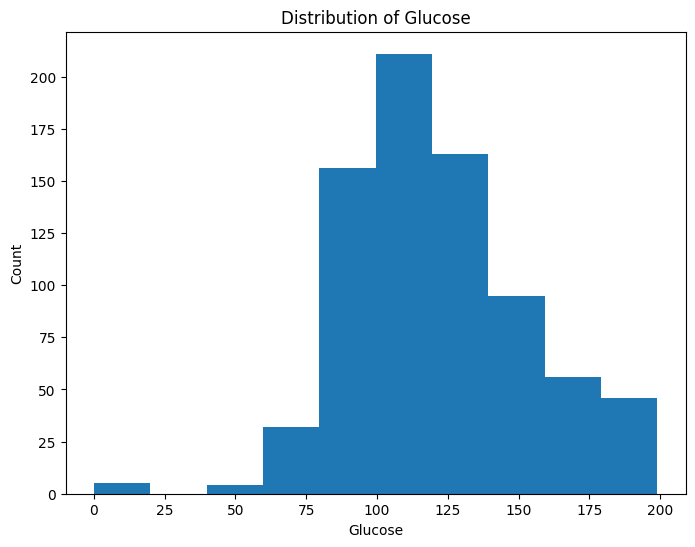

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(features['Glucose'], bins=10)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Distribution of Glucose')
plt.show()

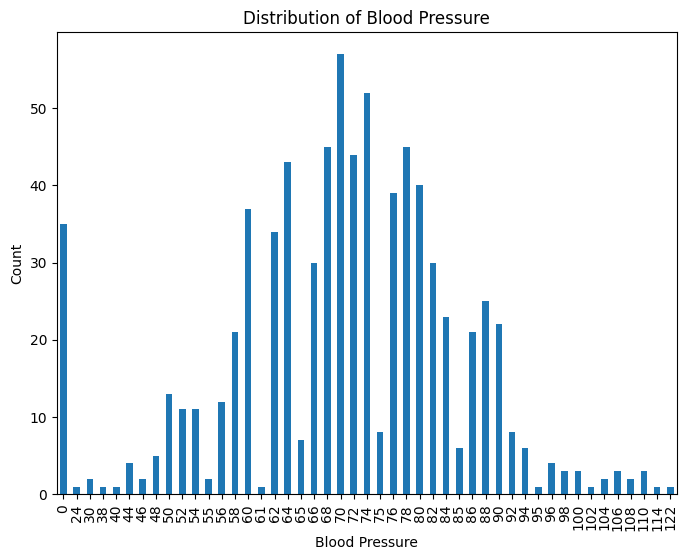

In [17]:
plt.figure(figsize=(8, 6))
features['BloodPressure'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure')
plt.show()

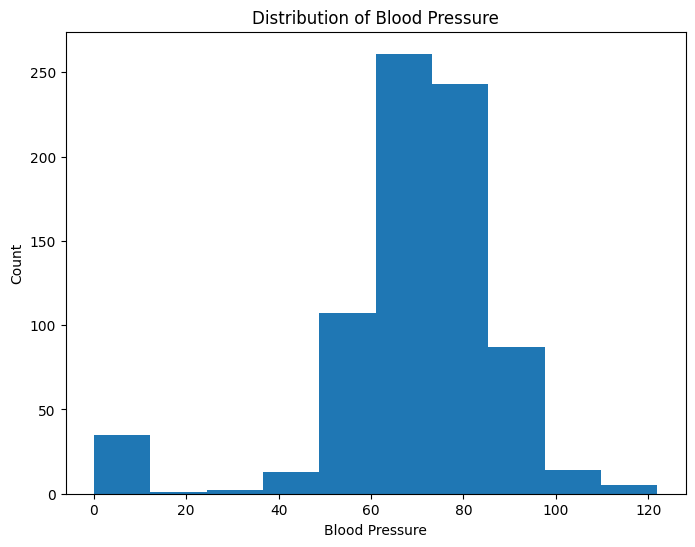

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(features['BloodPressure'], bins=10)
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure')
plt.show()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score of Gaussian NB model:" )
print(accuracy)

Accuracy score of Gaussian NB model:
0.7597402597402597


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [27]:
insurance_upload = files.upload()
insurance_file = list(insurance_upload.keys())[0]
insurance_data = pd.read_csv(insurance_file)

Saving insurance.csv to insurance.csv


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

num_columns = ['age', 'bmi', 'children', 'expenses']
categorical_cols = ['sex', 'smoker', 'region']

In [29]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    insurance_data[col] = label_encoder.fit_transform(insurance_data[col])

In [30]:
# scale the numerical columns
scaler = StandardScaler()

insurance_data[num_columns] = scaler.fit_transform(insurance_data[num_columns])

# scale charges separately
charges = insurance_data['expenses']
insurance_data = insurance_data.drop('expenses', axis=1)
scaled_charges = scaler.fit_transform(charges.values.reshape(-1, 1))

### 5. Split the data.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_data, scaled_charges, test_size=0.2, random_state=42)

In [36]:
y_train = y_train.ravel()
y_test = y_test.ravel()

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [37]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# using RandomisedSearchCV
svr = SVR()
randomized_search = RandomizedSearchCV(
    svr, param_distributions=param_grid, cv=3, scoring='neg_mean_absolute_error', random_state=42
)
randomized_search.fit(X_train, y_train)

# Get the best parameters and initialize the SVR model
best_params = randomized_search.best_params_
svr = SVR(**best_params)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1}
MAE: 0.2146648523379284
MSE: 0.15345106396716898


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'loss': ['linear', 'square', 'exponential']
}

#  using GridSearchCV - hyperparameter tuning
adaboost = AdaBoostRegressor()
grid_search = GridSearchCV(
    adaboost, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error'
)
grid_search.fit(X_train, y_train)

# Get the best parameters and initialize AdaBoostRegressor model
best_params = grid_search.best_params_
adaboost = AdaBoostRegressor(**best_params)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)


In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'loss': 'linear', 'n_estimators': 50}
MAE: 0.3738474379470036
MSE: 0.2090370761011681


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)

# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

In [47]:
models = ['AdaBoostRegressor', 'Random Forest Regressor', 'Gradient Boosting Regression', 'XGBoost Regressor']
mae_scores = [mae, rf_mae, gb_mae, xgb_mae]
mse_scores = [mse, rf_mse, gb_mse, xgb_mse]

print("Model Comparison (MAE):")
for model, mae_score in zip(models, mae_scores):
    print(f"{model}: {mae_score}")

print("\nModel Comparison (MSE):")
for model, mse_score in zip(models, mse_scores):
    print(f"{model}: {mse_score}")

Model Comparison (MAE):
AdaBoostRegressor: 0.3738474379470036
Random Forest Regressor: 0.20678984254802374
Gradient Boosting Regression: 0.2067170026392226
XGBoost Regressor: 0.21942363071903592

Model Comparison (MSE):
AdaBoostRegressor: 0.2090370761011681
Random Forest Regressor: 0.14599224279414424
Gradient Boosting Regression: 0.1323881593628986
XGBoost Regressor: 0.16298446229066307


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [48]:
ads_upload = files.upload()
ads_file = list(ads_upload.keys())[0]
ads_data = pd.read_csv(ads_file)

Saving dataset.csv to dataset.csv


### 2. Split the data.

In [49]:
label_encoder = LabelEncoder()
for column in ads_data.columns:
    if ads_data[column].dtype == object:
        ads_data[column] = label_encoder.fit_transform(ads_data[column])

X = ads_data.drop('Result', axis=1)
y = ads_data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [52]:
param_grid = {
    'Decision Tree': {'max_depth': [3, 5, 7]},
    'Random Forest': {'n_estimators': [50, 100, 150]},
    'Adaboost': {'n_estimators': [50, 100, 150]},
    'Gradient Boost': {'n_estimators': [50, 100, 150]},
    'XGBoost': {'n_estimators': [50, 100, 150]}
}

In [53]:
best_params = {}
for model_name, model in models.items():
    print(f"Model: {model_name}")

    if model_name in param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid[model_name], cv=3)
        grid_search.fit(X_train, y_train)
        best_params[model_name] = grid_search.best_params_
        model = model.set_params(**grid_search.best_params_)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print()

Model: Decision Tree
Accuracy: 0.9380

Model: Random Forest
Accuracy: 0.9629

Model: Adaboost
Accuracy: 0.9349

Model: Gradient Boost
Accuracy: 0.9521

Model: XGBoost
Accuracy: 0.9593



In [54]:
# Print the best parameters for each model
print("Best Parameters:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Best Parameters:
Decision Tree: {'max_depth': 7}
Random Forest: {'n_estimators': 100}
Adaboost: {'n_estimators': 150}
Gradient Boost: {'n_estimators': 150}
XGBoost: {'n_estimators': 150}


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.